In [2]:
!pip install --upgrade --force-reinstall numpy pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 21.0 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1

In [2]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import contractions
import re
import nltk
from nltk.tokenize import ToktokTokenizer
import spacy

In [ ]:
def preprocess(series):
    series = series.apply(lambda x: str(x).lower())

    def remove_contractions(row):
        return contractions.fix(row)
    series = series.apply(lambda x: remove_contractions(x))

    series = series.str.replace(r'[^\w\s]', '', regex=True)

    series = series.str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

    def remove_numbers(text):
        pattern = r'[^a-zA-z.,!?/:;\"\'\s]'
        return re.sub(pattern, '', text)
    series = series.apply(lambda x: remove_numbers(x))

    nlp = spacy.load('en_core_web_sm')
    def get_lem(text):
        text = nlp(text)
        text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
        return text
    series = series.apply(lambda x: get_lem(x))

    tokenizer = ToktokTokenizer()
    stopword_list = nltk.corpus.stopwords.words('english')
    stopword_list.remove('not')
    def remove_stopwords(text):
        tokens = tokenizer.tokenize(text)
        tokens = [token.strip() for token in tokens]
        t = [token for token in tokens if token.lower() not in stopword_list]
        text = ' '.join(t)
        return text
    series = series.apply(lambda x: remove_stopwords(x))
    return series

### IndiaToday

In [ ]:
df = pd.read_excel("IndiaToday.xlsx")

In [ ]:
def remove_edited(row):
    index_of_edited_by = row.find("Edited By: ")

    if index_of_edited_by != -1:
        modified_text = row[:index_of_edited_by]
        return modified_text
    else:
        return row
df.Body = df.Body.apply(lambda x: remove_edited(x))

In [ ]:
df = df[~df['Body'].apply(lambda x: isinstance(x, (float, int)))]

In [ ]:
df = df[~df['Heading'].str.contains('horoscope', case=False)]

In [ ]:
df.Body = preprocess(df.Body)

In [ ]:
df = df.dropna()

In [ ]:
# file_name = "IndiaToday_Preprocessed.xlsx"
# df.to_excel(file_name, index=False)

### IndiaTV

In [ ]:
df2 = pd.read_excel("IndiaTv.xlsx")

In [ ]:
df2 = df2[~df2['Body'].apply(lambda x: isinstance(x, (float, int)))]

In [ ]:
df2 = df2.loc[~(df2.Heading.str.contains("Aaj Ki Baat") | df2.Heading.str.contains("Horoscope")\
                | df2.Heading.str.contains("Aap Ki Adalat"))]

In [ ]:
df2 = df2[~df2['Heading'].str.contains('horoscope', case=False)]

In [ ]:
df2.Body = preprocess(df2.Body)

In [ ]:
df2 = df2.dropna()

In [ ]:
# file_name = "IndiaTV_Preprocessed.xlsx"
# df2.to_excel(file_name, index=False)

### News18

In [ ]:
df3 = pd.read_excel("News18.xlsx")

In [ ]:
df3 = df3[~df3['Body'].apply(lambda x: isinstance(x, (float, int)))]

In [ ]:
df3 = df3[~df3['Heading'].str.contains('horoscope', case=False)]

In [ ]:
df3.Body = preprocess(df3.Body)

In [ ]:
df3 = df3.dropna()

In [ ]:
# file_name = "News18_Preprocessed.xlsx"
# df3.to_excel(file_name, index=False)

### ThePrint

In [ ]:
df4 = pd.read_excel("ThePrint.xlsx")

In [ ]:
df4 = df4[~df4['Body'].apply(lambda x: isinstance(x, (float, int)))]

In [ ]:
df4 = df4[~(df4['Body'].str.contains('dear subscriber', case=False))]

In [ ]:
df4 = df4[~df4['Heading'].str.contains('horoscope', case=False)]

In [ ]:
df4.Body = preprocess(df4.Body)

In [ ]:
df4 = df4.dropna()

In [ ]:
# file_name = "ThePrint_Preprocessed.xlsx"
# df4.to_excel(file_name, index=False)

### Merge Datasets

In [ ]:
df5 = pd.concat([df, df2, df3, df4], ignore_index=True, axis=0)

In [ ]:
df5.Heading.dropna(inplace=True)

In [ ]:
df5.Body.isna().sum()

0

In [ ]:
import numpy as np

In [ ]:
df5 = df5[~(df5.Body == "")]

In [ ]:
file_name = "Final_Prepped_Data.xlsx"
df5.to_excel(file_name, index=False)

### News18_Punjab

In [ ]:
df6 = pd.read_excel("News18_Punjab.xlsx")

In [ ]:
df6.iloc[10, 1]

"Apple ਦੀ ਨਵੀਂ ਆਈਫੋਨ 15 ਸੀਰੀਜ਼ 'ਚ ਨੇ ਐਂਟਰੀ ਕਰ ਲਈ ਹੈ ਅਤੇ ਇਸ ਸੀਰੀਜ਼ 'ਚ ਕੰਪਨੀ ਨੇ ਚਾਰ ਨਵੇਂ ਮਾਡਲ iPhone 15, iPhone 15 Plus, iPhone 15 Pro ਅਤੇ iPhone 15 Pro Max ਨੂੰ ਸ਼ਾਮਲ ਕੀਤਾ ਹੈ। ਨਵੇਂ ਫੋਨ ਦੀ ਪ੍ਰੀ-ਬੁਕਿੰਗ 15 ਸਤੰਬਰ ਤੋਂ ਸ਼ੁਰੂ ਹੋ ਗਈ ਹੈ ਅਤੇ ਡਿਲੀਵਰੀ 22 ਸਤੰਬਰ ਤੋਂ ਸ਼ੁਰੂ ਹੋਵੇਗੀ। ਨਵੇਂ ਆਈਫੋਨ ਦੇ ਆਉਣ ਤੋਂ ਬਾਅਦ, ਪੁਰਾਣੇ ਆਈਫੋਨ ਦੀ ਕੀਮਤ ਘੱਟ ਹੋਣ 'ਤੇ ਕੁਝ ਲੋਕ ਉਸ ਮਾਡਲ ਨੂੰ ਖਰੀਦਣ ਦਾ ਪਲਾਨ ਬਣਾਉਂਦੇ ਹਨ। ਐਪਲ ਨੇ ਆਪਣੇ ਆਈਫੋਨ 14, 14 ਪ੍ਰੋ, ਆਈਫੋਨ 13 ਦੀ ਕੀਮਤ ਵਿੱਚ ਕਟੌਤੀ ਕਰ ਦਿੱਤੀ ਹੈਅਜਿਹੇ 'ਚ ਸਵਾਲ ਇਹ ਬਣਦਾ ਹੈ ਕਿ ਕੀ ਆਈਫੋਨ 15 ਦੇ ਆਉਣ ਤੋਂ ਬਾਅਦ ਆਈਫੋਨ 13 ਖਰੀਦਣਾ ਇੱਕ ਫਾਇਦੇ ਦਾ ਸੌਦਾ ਰਹੇਗਾ ਜਾਂ 2 ਸਾਲ ਪੁਰਾਣੇ ਮਾਡਲ ਨੂੰ ਖਰੀਦਣਾ ਮੂਰਖਤਾ ਹੈ। ਇਸ ਨੂੰ ਸਮਝਣ ਲਈ ਜ਼ਰੂਰੀ ਹੈ ਕਿ ਇਨ੍ਹਾਂ ਦੋਵਾਂ ਫੋਨਾਂ ਦੇ ਫੀਚਰਸ 'ਚ ਫਰਕ ਦੇਖ ਲਿਆ ਜਾਵੇ।ਸਭ ਤੋਂ ਪਹਿਲਾਂ, ਕੀਮਤ ਦੀ ਗੱਲ ਕਰੀਏ ਤਾਂ ਆਈਫੋਨ 15 ਦੀ ਸ਼ੁਰੂਆਤੀ ਕੀਮਤ 79,900 ਰੁਪਏ ਹੈ। ਜਦੋਂ ਕਿ iPhone 13 ਨੂੰ 59,900 ਰੁਪਏ ਦੀ ਸ਼ੁਰੂਆਤੀ ਕੀਮਤ 'ਤੇ ਘਰ ਲਿਆਂਦਾ ਜਾ ਸਕਦਾ ਹੈ।Display: ਆਈਫੋਨ 15 ਵਿੱਚ 6.1 ਇੰਚ ਦੀ ਸੁਪਰ ਰੈਟੀਨਾ XDR ਡਿਸਪਲੇ ਦਿੱਤੀ ਗਈ ਹੈ। ਆਈਫੋਨ 13 ਵਿੱਚ ਵੀ 6.1 ਇੰਚ ਦੀ ਸੁਪਰ ਰੇਟੀਨਾ ਐਕਸਡੀਆਰ ਡਿਸਪਲੇਅ ਹੈ। iPhone 15 ਵਿੱਚ ਐਲੂਮੀਨੀਅਮ ਦੇ ਨਾਲ ਕਲਰ ਇਨਫਿਊਜ਼ਡ ਗਲਾਸ ਬੈਕ ਮਿਲਦਾ

In [ ]:
def preprocess_punjabi(series):
    series = series.str.replace(r'[^\w\s]', '', regex=True)
    def remove_nums(row):
        devanagari_nums = ('०','१','२','३','४','५','६','७','८','९')
        for c, n in enumerate(devanagari_nums):
            article = re.sub(n, str(c), row)
        return article
    series = series.apply(lambda x: remove_nums(x))
    series = series.str.replace(r'\d+', '', regex=True)
    return series

In [ ]:
df6.Body = preprocess_punjabi(df6.Body)

In [ ]:
df6.dropna(inplace=True)

In [ ]:
df6 = [~(df6.Body == "")]

### AajTak_Hindi

In [ ]:
df7 = pd.read_excel("AajTak.xlsx")

In [ ]:
def preprocess_hindi(series):
    series = series.str.replace(r'[^\w\s]', '', regex=True)
    series = series.str.replace("\n", '')
    series = series.str.replace("\xa0", '')
    def remove_nums(row):
        devanagari_nums = ('०','१','२','३','४','५','६','७','८','९')
        for c, n in enumerate(devanagari_nums):
            article = re.sub(n, str(c), row)
        return article

    stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
    stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    punctuations = ['nn', 'n', '।', '/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', ';', '-','}']
    to_be_removed = stopwords_hi + punctuations + stopwords_en
    def remove_stopwords_and_punctuation(text):
        words = text.split()
        cleaned_words = [word for word in words if word not in to_be_removed]
        return ' '.join(cleaned_words)

    series = series.apply(remove_stopwords_and_punctuation)
    series = series.apply(lambda x: remove_nums(str(x)))
    series = series.str.replace(r'\d+', '', regex=True)
    return series

In [ ]:
df7.Body = preprocess_hindi(df7.Body)

In [ ]:
def preprocess_hin_pun(series):
    series = series.str.replace("\n", '')
    series = series.str.replace("\xa0", '')
    return series
df["Body"] = preprocess_hin_pun(df["Body"])

In [ ]:
!pip  install transformers==4.22.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 83.9 MB/s eta 0:00:00


In [ ]:
!pip install autokeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.9/944.9 kB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 50.3 MB/s eta 0:00:00


In [ ]:
import transformers
import tensorflow as tf
import autokeras as ak

import numpy as np
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Using TensorFlow backend


In [ ]:
deviceList = tf.test.gpu_device_name()
deviceList

'/device:GPU:0'

In [ ]:
df = pd.read_csv("/content/labelled.csv")
df.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  \
0  madras high court issue significant remark ami...  Judiciary   
1  seattle police officer guild friday come defen...      Crime   
2  first official meeting one nation one election...   Politics   
3  united airlines jet head rome turn around less...      Crime   
4  three terrorist kill infiltration bid foil sec...      Crime   

                                                 URL  
0  https://www.indiatoday.in/law/high-courts/stor...  
1  https://www.indiatoday.in/world/story/indian-s...  
2  https://www.indiatoday.in/india/story/one-nati...  
3  https://www.indiatoday.in/world/story/us-fligh...  
4  https://www.indiatoday.in/india/story/one-terr...

In [ ]:
category_count = df['Category'].value_counts()

categories = category_count.index

categories


Index(['Entertainment', 'Business', 'Politics', 'Judiciary', 'Crime',
       'Culture', 'Sports', 'Science', 'International', 'Technology'],
      dtype='object')

In [ ]:
categories = {
    "Entertainment" :   0,
"Business"  :       1,
"Politics"   :      2,
"Judiciary"   :     3,
"Crime"     :       4,
"Culture"    :      5,
"Sports"      :      6,
"Science"      :     7,
"International" :    8,
"Technology"     :   9
}

print(categories)


{'Entertainment': 0, 'Business': 1, 'Politics': 2, 'Judiciary': 3, 'Crime': 4, 'Culture': 5, 'Sports': 6, 'Science': 7, 'International': 8, 'Technology': 9}


In [ ]:
def map_to_encoding(text):
    return categories.get(text, -1)  # Return -1 if not found

# Create the 'category_encoding' column
df['category_encoding'] = df['Category'].apply(map_to_encoding)

In [ ]:
len(df)

11583

In [ ]:
df.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  \
0  madras high court issue significant remark ami...  Judiciary   
1  seattle police officer guild friday come defen...      Crime   
2  first official meeting one nation one election...   Politics   
3  united airlines jet head rome turn around less...      Crime   
4  three terrorist kill infiltration bid foil sec...      Crime   

                                                 URL  category_encoding  
0  https://www.indiatoday.in/law/high-courts/stor...                  3  
1  https://www.indiatoday.in/world/story/indian-s...                  4  
2  https://www.indiatoday.in/india/story/one-nati...                  2  
3  https://www.indiatoday.in/world/story/us-fligh...                  4  
4  https://www.indiatoday.in/india/story/one-terr...                  4

In [ ]:
newsArticlesBody = df['Body'].to_list()

categoryLabels = df['category_encoding'].to_list()

In [ ]:
# Split the data into training, validation, and test sets (80% train, 10% val, 10% test)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    newsArticlesBody, categoryLabels, test_size=0.2, random_state=42, stratify = categoryLabels)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    test_texts, test_labels, test_size=0.5, random_state=42,  stratify = test_labels)

# Display the size of each dataset
print("Train set size:", len(train_texts))
print("Validation set size:", len(val_texts))
print("Test set size:", len(test_texts))

Train set size: 9266
Validation set size: 1158
Test set size: 1159


In [ ]:
clf = ak.TextClassifier(max_trials=2, metrics=['accuracy'])  # Adjust max_trials as needed
# Convert text data to numpy arrays
X_train = np.array(train_texts)
y_train = np.array(train_labels)
X_val = np.array(val_texts)
y_val = np.array(val_labels)

# Train the model
clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
290/290 [==============================] - 43s 140ms/step - loss: 1.8750 - accuracy: 0.3352 - val_loss: 1.3030 - val_accuracy: 0.5639
Epoch 2/10
290/290 [==============================] - 3s 10ms/step - loss: 1.0539 - accuracy: 0.6688 - val_loss: 0.9530 - val_accuracy: 0.6926
Epoch 3/10
290/290 [==============================] - 3s 9ms/step - loss: 0.7262 - accuracy: 0.7778 - val_loss: 0.9464 - val_accuracy: 0.7098
Epoch 4/10
290/290 [==============================] - 3s 9ms/step - loss: 0.5321 - accuracy: 0.8373 - val_loss: 0.9999 - val_accuracy: 0.7193
Epoch 5/10
290/290 [==============================] - 4s 15ms/step - loss: 0.3836 - accuracy: 0.8825 - val_loss: 1.0884 - val_accuracy: 0.7150
Epoch 6/10
290/290 [==============================] - 3s 11ms/step - loss: 0.2837 - accuracy: 0.9140 - val_loss: 1.1978 - val_accuracy: 0.7124
Epoch 7/10
290/290 [==============================] - 3s 10ms/step - loss: 0.1899 - accuracy: 0.9392 - val_loss: 1.3822 - val_accuracy: 0.7073

In [ ]:
test_texts = np.array(test_texts)
test_labels = np.array(test_labels)

# Now, you can proceed with evaluation
loss, accuracy = clf.evaluate(test_texts, test_labels)
print("Test accuracy:", accuracy)

37/37 [==============================] - 0s 6ms/step - loss: 1.6727 - accuracy: 0.7299
Test accuracy: 0.7299395799636841


In [ ]:
keras_model = clf.export_model()
# Save the Keras model to an HDF5 file

In [ ]:
print("Type of keras_model:", type(keras_model))


Type of keras_model: <class 'keras.src.engine.functional.Functional'>


In [ ]:
# Save the model architecture as JSON
model_json = keras_model.to_json()
with open("AutoKerasModel.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights using TensorFlow format
keras_model.save("AutoKerasModel_weights", save_format="tf")


In [ ]:
keras_model.save("temp1")

In [ ]:
!zip -r /content/temp1.zip /content/temp1

  adding: content/temp1/ (stored 0%)
  adding: content/temp1/fingerprint.pb (stored 0%)
  adding: content/temp1/saved_model.pb (deflated 79%)
  adding: content/temp1/variables/ (stored 0%)
  adding: content/temp1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/temp1/variables/variables.index (deflated 50%)
  adding: content/temp1/keras_metadata.pb (deflated 88%)
  adding: content/temp1/assets/ (stored 0%)


In [ ]:
keras_model.save("AutoKerasModel1", save_format='tf')

In [ ]:
import pickle
# Save the model JSON to a pickle file
with open("AutoKerasModel_New.pkl", "wb") as file:
    pickle.dump(keras_model, file)


In [ ]:
import joblib

# Save the entire model using joblib
with open("AutoKerasModel.joblib", "wb") as file:
    joblib.dump(keras_model, file)


In [ ]:
test = keras_model.predict()

1/1 [==============================] - 0s 33ms/step


In [ ]:
test[0].argmax()

0

In [ ]:
def get_key_from_value(dictionary, value):
    # Iterate through the dictionary to find the key for the given value
    for key, val in dictionary.items():
        if val == value:
            return key
    return None  # Return None if the value is not found


In [ ]:
value_to_find = test[0].argmax()
key_for_value = get_key_from_value(categories, value_to_find)

# Print the key for the given value
print("Key for value", value_to_find, "is:", key_for_value)

Key for value 0 is: Entertainment


In [ ]:
loaded_model = tf.keras.models.load_model("AutoKerasModel1")


In [ ]:
loaded_model.predict(["several report round yrfs tiger vs pathaan bring salman khan shah rukh khan together fullfledge film big deal hype possibility film create huge rumour claim aditya chopra go host joint narration tiger vs pathaan salman khan shah rukh khan yrf however say muchawaited film already narrate two superstar two separate meeting month backadvertisementsalman khan shah rukh khan give nod tiger vs pathaanthe script tiger vs pathaan already narrate salman khan shah rukh khan source also confirm aditya chopra narrate film megastar script lock team tiger vs pathaan start prep november shoot commence march next year yes film go floor march trade source say tiger vs pathaan script lock two megastar hindi cinema give nod script film huge milestone moment see two giant indian cinema come together fullfledge film boxoffice juggernaut karan arjun first love script get convince good satisfy expectation people big onscreen reunionthe person also add aditya chopra hold individual meeting srk salman respectively narrate film superstar love story film go floor marchmore aboit tiger vs pathaan yrf spy franchisethe script tiger vs pathaan already narrate salman khan shah rukh khan source also confirm aditya chopra narrate film megastar script lock team tiger vs pathaan start prep november shoot commence march next year yes film go floor march trade source say tiger vs pathaan script lock two megastar hindi cinema give nod script film huge milestone moment see two giant indian cinema come together fullfledge film boxoffice juggernaut karan arjun first love script get convince good satisfy expectation people big onscreen reunionthe person also add aditya chopra hold individual meeting srk salman respectively narrate film superstar love story film go floor marchmore aboit tiger vs pathaan yrf spy franchisedirecte siddharth anand tiger vs pathaan tout big film india ever produce part yrf spy universe kick tiger franchise star salman khan katrina kaif begin ek tha tiger tiger zinda hai continue war star hrithik roshan tiger shroffthen come pathaan star shah rukh khan deepika padukone john abraham alltime big hit hindi cinema four film yrf spy universe blockbuster next film spy franchise yrf tiger due release november diwali festival holiday"])

1/1 [==============================] - 0s 186ms/step


array([[9.9999905e-01, 3.0695049e-15, 3.3861314e-10, 2.5522180e-08,
        6.0001502e-09, 5.0353600e-07, 5.0163550e-07, 8.0316062e-15,
        2.1180309e-16, 1.0434401e-12]], dtype=float32)

In [ ]:
!zip -r /content/AutoKerasZip.zip /content/AutoKerasModel1


  adding: content/AutoKerasModel1/ (stored 0%)
  adding: content/AutoKerasModel1/fingerprint.pb (stored 0%)
  adding: content/AutoKerasModel1/saved_model.pb (deflated 79%)
  adding: content/AutoKerasModel1/variables/ (stored 0%)
  adding: content/AutoKerasModel1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/AutoKerasModel1/variables/variables.index (deflated 50%)
  adding: content/AutoKerasModel1/keras_metadata.pb (deflated 88%)
  adding: content/AutoKerasModel1/assets/ (stored 0%)


In [ ]:
!pip  install transformers==4.22.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 23.5 MB/s eta 0:00:00


In [ ]:
import transformers
import tensorflow as tf
from transformers import DistilBertTokenizer, DistilBertModel
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
deviceList = tf.test.gpu_device_name()

In [ ]:
deviceList

'/device:GPU:0'

In [ ]:
df = pd.read_csv("/content/labelled.csv")
df.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  \
0  madras high court issue significant remark ami...  Judiciary   
1  seattle police officer guild friday come defen...      Crime   
2  first official meeting one nation one election...   Politics   
3  united airlines jet head rome turn around less...      Crime   
4  three terrorist kill infiltration bid foil sec...      Crime   

                                                 URL  
0  https://www.indiatoday.in/law/high-courts/stor...  
1  https://www.indiatoday.in/world/story/indian-s...  
2  https://www.indiatoday.in/india/story/one-nati...  
3  https://www.indiatoday.in/world/story/us-fligh...  
4  https://www.indiatoday.in/india/story/one-terr...

In [ ]:
df.shape

(11583, 4)

In [ ]:
df['count'] = df['Body'].apply(lambda x: len(x.split()))

<Figure size 800x800 with 0 Axes>

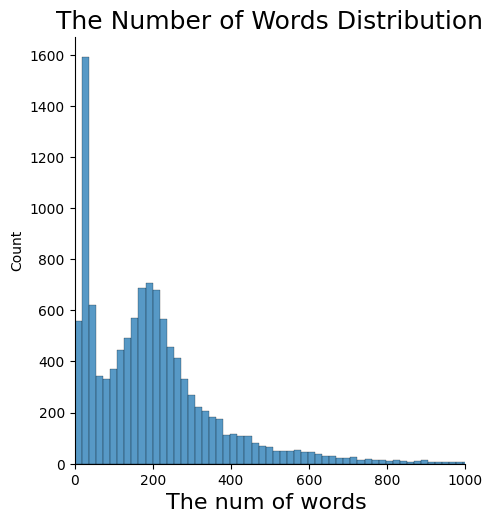

In [ ]:
plt.figure(figsize= (8, 8))

sns.displot(df['count'])

plt.xlim(0, 1000)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

In [ ]:
category_count = df['Category'].value_counts()

categories = category_count.index

categories


Index(['Entertainment', 'Business', 'Politics', 'Judiciary', 'Crime',
       'Culture', 'Sports', 'Science', 'International', 'Technology'],
      dtype='object')

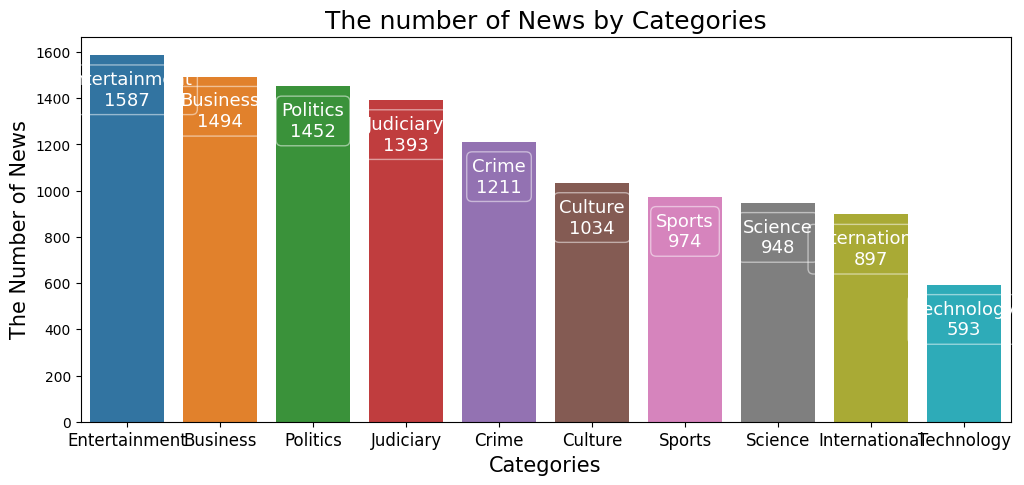

In [ ]:
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of News', size= 15)

plt.xticks(size = 12)

plt.title("The number of News by Categories" , size = 18)

plt.show()

In [ ]:
categories = {
    "Entertainment" :   0,
"Business"  :       1,
"Politics"   :      2,
"Judiciary"   :     3,
"Crime"     :       4,
"Culture"    :      5,
"Sports"      :      6,
"Science"      :     7,
"International" :    8,
"Technology"     :   9
}

print(categories)


{'Entertainment': 0, 'Business': 1, 'Politics': 2, 'Judiciary': 3, 'Crime': 4, 'Culture': 5, 'Sports': 6, 'Science': 7, 'International': 8, 'Technology': 9}


In [ ]:
def map_to_encoding(text):
    return categories.get(text, -1)  # Return -1 if not found

# Create the 'category_encoding' column
df['category_encoding'] = df['Category'].apply(map_to_encoding)

In [ ]:
df.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  \
0  madras high court issue significant remark ami...  Judiciary   
1  seattle police officer guild friday come defen...      Crime   
2  first official meeting one nation one election...   Politics   
3  united airlines jet head rome turn around less...      Crime   
4  three terrorist kill infiltration bid foil sec...      Crime   

                                                 URL  count  category_encoding  
0  https://www.indiatoday.in/law/high-courts/stor...    174                  3  
1  https://www.indiatoday.in/world/story/indian-s...    699                  4  
2  https://www.indiatoday.in/india/story/one-nati...    168                  2  
3  https://www.indiatoday.in/world/story/us-fligh...     95                  4  
4  https://www.indiatoday.in/india/story/one-terr...    106                  4

In [ ]:
newsArticlesBody = df['Body'].to_list()

categoryLabels = df['category_encoding'].to_list()

In [ ]:
# Split the data into training, validation, and test sets (80% train, 10% val, 10% test)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    newsArticlesBody, categoryLabels, test_size=0.2, random_state=42, stratify = categoryLabels)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    test_texts, test_labels, test_size=0.5, random_state=42, stratify = test_labels)

# Display the size of each dataset
print("Train set size:", len(train_texts))
print("Validation set size:", len(val_texts))
print("Test set size:", len(test_texts))

# Verify the splitting and shuffle
print("Sample train text:", train_texts[0])
print("Sample train label:", train_labels[0])


Train set size: 9266
Validation set size: 1158
Test set size: 1159
Sample train text: rashmika mandanna allu arjun highly anticipate film pushpa rule leave fan eager excite film release maker leave part cliffhanger people high expectation sequel among cast member malayalam superstar fahadh faasil cameo appearance ips bhanwar singh shekhawat receive major attention intensity menacing performance although make brief appearance prequel fahadh play significant role alongside allu arjun upcoming film meanwhile late report state actor charge staggering rs crore role villain sequel leave fan astonishedfahadh faasil substantial fee role make one highestpaid villain south indian film industry accord report deccan chronicle consider film grand scale budget producer willing meet demand fahadh faasil fee rs crore role pushpa portion demand pushpa despite low compensation menacing performance iconic dialogue make last impacta source close production say talented actor kind role effortlessly ask ess

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)


In [ ]:
from transformers import TFDistilBertModel, DistilBertTokenizer

In [ ]:
# Define the model architecture using Keras Functional API
def build_model(max_length, num_labels):
    input_ids = Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

    # Load the DistilBERT model
    distilbert_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

    # Freeze the DistilBERT layers
    distilbert_model.trainable = False

    # Get the DistilBERT output
    distilbert_output = distilbert_model([input_ids, attention_mask])[0]

    # Add a dense layer for classification
    output = Dense(num_labels, activation='softmax')(distilbert_output[:, 0, :])  # We use only the [CLS] token

    # Define the model
    model = Model(inputs=[input_ids, attention_mask], outputs=output)

    return model

In [ ]:
max_length = 512  # Maximum sequence length
num_labels = 10  # Number of labels

# Build the model
model = build_model(max_length, num_labels)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_distil_bert_model_1 (TF  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 DistilBertModel)            den_state=(None, 512, 768)   0          'attention_mask[0][0]']      
                             , hidden_states=None, atte                                     

In [ ]:
# Convert BatchEncoding objects to NumPy arrays
train_input_ids = np.array(train_encodings["input_ids"])
train_attention_mask = np.array(train_encodings["attention_mask"])
train_labels = np.array(train_labels)

val_input_ids = np.array(train_encodings["input_ids"])
val_attention_mask = np.array(train_encodings["attention_mask"])
val_labels = np.array(train_labels)
valDataset = ([val_input_ids, val_attention_mask], val_labels)

In [ ]:

model.fit(
    x=[train_input_ids, train_attention_mask],
    y=train_labels,
    validation_data=valDataset,
    epochs=10,
    batch_size=16,
)

# Print the training progress
print("Training completed.")


Epoch 1/10
580/580 [==============================] - 411s 698ms/step - loss: 1.0924 - accuracy: 0.6500 - val_loss: 0.8430 - val_accuracy: 0.7301
Epoch 2/10
580/580 [==============================] - 402s 694ms/step - loss: 0.9715 - accuracy: 0.6995 - val_loss: 0.8140 - val_accuracy: 0.7479
Epoch 3/10
580/580 [==============================] - 402s 694ms/step - loss: 0.9363 - accuracy: 0.7140 - val_loss: 0.9629 - val_accuracy: 0.7077
Epoch 4/10
580/580 [==============================] - 402s 694ms/step - loss: 0.9261 - accuracy: 0.7184 - val_loss: 0.7933 - val_accuracy: 0.7464
Epoch 5/10
580/580 [==============================] - 402s 694ms/step - loss: 0.9444 - accuracy: 0.7171 - val_loss: 0.7412 - val_accuracy: 0.7627
Epoch 6/10
580/580 [==============================] - 402s 694ms/step - loss: 0.9092 - accuracy: 0.7204 - val_loss: 0.9560 - val_accuracy: 0.6881
Epoch 7/10
580/580 [==============================] - 402s 693ms/step - loss: 0.8968 - accuracy: 0.7158 - val_loss: 0.7212 -

In [ ]:
model.save("distilbert_model2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
model.evaluate((val_input_ids, val_attention_mask), val_labels)

290/290 [==============================] - 181s 623ms/step - loss: 0.7719 - accuracy: 0.7543


[0.7719079852104187, 0.7542629241943359]

In [ ]:
test_encodings = tokenizer(test_texts, truncation = True, padding = True  )

test_input_ids = np.array(test_encodings["input_ids"])
test_attention_mask = np.array(test_encodings["attention_mask"])

In [ ]:
y_pred = model.predict([test_input_ids, test_attention_mask])
y_pred

37/37 [==============================] - 24s 608ms/step


array([[2.0829034e-06, 2.3786721e-03, 3.7582874e-01, ..., 8.0072600e-04,
        4.5939180e-01, 2.9411990e-06],
       [4.8598667e-05, 1.6409015e-04, 1.4571157e-04, ..., 9.4836032e-05,
        2.4267675e-04, 3.7134264e-08],
       [1.2095400e-05, 9.9741971e-01, 5.6734916e-05, ..., 2.9068076e-04,
        9.0385540e-05, 9.0996315e-07],
       ...,
       [1.5054489e-06, 7.5442536e-04, 1.7141207e-03, ..., 1.0732346e-04,
        9.9618441e-01, 5.2502852e-08],
       [1.2633367e-02, 1.8998709e-01, 6.2949006e-03, ..., 4.8188688e-03,
        2.1588394e-02, 7.1208756e-03],
       [1.5029192e-06, 1.0818379e-02, 7.6052409e-01, ..., 8.5057318e-04,
        8.8119612e-04, 1.9310053e-06]], dtype=float32)

In [ ]:
y_pred[0].argmax()

8

In [ ]:
y_pred_new = []
for i in range(len(y_pred)):
   y_pred_new.append(y_pred[i].argmax())

In [ ]:
y_test = test_labels
y_test

[2,
 6,
 1,
 6,
 1,
 7,
 0,
 4,
 3,
 2,
 5,
 8,
 4,
 1,
 0,
 5,
 5,
 4,
 0,
 3,
 3,
 5,
 8,
 1,
 9,
 7,
 1,
 0,
 1,
 2,
 0,
 0,
 6,
 0,
 6,
 0,
 1,
 0,
 1,
 0,
 4,
 3,
 5,
 5,
 1,
 8,
 0,
 8,
 3,
 0,
 1,
 9,
 1,
 1,
 1,
 7,
 3,
 8,
 5,
 3,
 1,
 0,
 6,
 7,
 0,
 6,
 2,
 8,
 4,
 2,
 7,
 0,
 3,
 3,
 6,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 9,
 6,
 9,
 5,
 4,
 7,
 4,
 6,
 1,
 0,
 3,
 2,
 2,
 5,
 5,
 8,
 8,
 0,
 4,
 1,
 2,
 6,
 7,
 4,
 0,
 9,
 2,
 2,
 5,
 5,
 2,
 9,
 1,
 2,
 2,
 1,
 6,
 8,
 1,
 5,
 0,
 9,
 3,
 4,
 5,
 5,
 3,
 0,
 5,
 3,
 0,
 4,
 9,
 2,
 6,
 1,
 7,
 8,
 4,
 4,
 8,
 2,
 2,
 8,
 3,
 0,
 6,
 5,
 4,
 1,
 7,
 5,
 3,
 1,
 3,
 2,
 0,
 0,
 5,
 2,
 6,
 6,
 4,
 6,
 1,
 6,
 0,
 7,
 4,
 9,
 0,
 2,
 5,
 4,
 6,
 3,
 9,
 6,
 2,
 8,
 3,
 2,
 6,
 5,
 3,
 2,
 6,
 7,
 4,
 6,
 9,
 6,
 3,
 5,
 1,
 2,
 2,
 2,
 0,
 5,
 3,
 0,
 3,
 3,
 7,
 2,
 9,
 1,
 1,
 9,
 8,
 5,
 4,
 3,
 3,
 8,
 0,
 3,
 8,
 2,
 3,
 0,
 0,
 8,
 3,
 1,
 6,
 2,
 8,
 1,
 1,
 0,
 5,
 4,
 1,
 2,
 3,
 8,
 1,
 1,
 0,
 4,
 7,
 1,
 3,
 4,
 1,
 0,


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test and y_pred are available

# Accuracy
accuracy = accuracy_score(y_test, y_pred_new)

# Precision
precision = precision_score(y_test, y_pred_new, average='weighted')  # Use 'weighted' for multiclass

# Recall
recall = recall_score(y_test, y_pred_new, average='weighted')  # Use 'weighted' for multiclass

# F1-score
f1 = f1_score(y_test, y_pred_new, average='weighted')  # Use 'weighted' for multiclass

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_new)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7187230371009491
Precision: 0.7639201994667857
Recall: 0.7187230371009491
F1-score: 0.7296743859419802
Confusion Matrix:
[[124   3   1  14   2  10   2   2   0   1]
 [  1 115   3  19   0   4   0   2   6   0]
 [  0   3  86  49   0   2   1   0   4   0]
 [  0  10   9 107   3   7   0   2   2   0]
 [  0   3   0  23  81   3   0   2   9   0]
 [  3   8   2  20   3  55   1  11   1   0]
 [  0   3   2   1   1   4  82   0   4   0]
 [  0   8   0   8   1   7   0  68   1   2]
 [  0   3   5   9   2   1   0   0  69   0]
 [  0   7   0   3   0   2   0   1   0  46]]


In [ ]:
# model.save('bertModel2')

# # Or save only the model architecture to a JSON file
# model_json = model.to_json()
# with open('bertModel2_architecture.json', 'w') as json_file:
#     json_file.write(model_json)

# # Save the model weights to an HDF5 file
# model.save_weights('bertModel2_weights.h5')

In [ ]:
def getEncoding(text):
  test_encodings = tokenizer(text, truncation = True, padding = True  , return_tensors='tf')

  test_input_ids = np.array(test_encodings["input_ids"])
  test_attention_mask = np.array(test_encodings["attention_mask"])
  return [test_input_ids, test_attention_mask]

In [ ]:
enc = getEncoding("bid republican presidential nomination vivek ramaswamy age present straightshoote truthteller formidable debater however former employee ventures roivant science strive asset management describe neurotic mercurial paranoid leader private reported business insiderdure recent republican primary debate august vivek ramaswamys confident charismatic bold demeanor endear voter showcase memeworthy entrepreneur thrive conflict not shy away fight however seven individual work closely ramaswamy claim neurotic mercurial paranoid leader accord one former colleague ramaswamy believe people exist serve suggest sense entitlement aspect management style peculiar example would order taco bell office birthday also know demand whiteglove service staff laundry list unusual rule procedure meet every need one notable eccentricity fixation temperature control insist office thermostat roivant strive set degree fahrenheit low make workspace uncomfortably cold coworker reportedly resort use space heater wear fleece sweater combat chill travel ramaswamys demand extend book multiple backup flight hotel room reflect obsessive need travel run smoothly even order takeout lunch assistant plate food serve napkin another quirk insistence cottage cheese serve desk every morning notably ramaswamy former army ranger personal security guard even enter presidential race security guard regularly sweep strive office security threat ramaswamys colleague business partner acknowledge intensity intelligence energy salesmanship work hedge fund qvt graduate harvard simultaneously attend yale age found roivant pharmaceutical company despite limited experience drug development employee roivant describe environment akin fastmoving tech startup traditional pharmaceutical company ramaswamys fundraising prowess attract investor softbank vision fund founder fund vike global investor ramaswamys business venture include roivant bring several drug development market achieve significant success however even project fail often benefit personally praise ramaswamy visionary leader view hype man use charisma eloquence boost value company two former employee file lawsuit accuse violate security law use unapproved marketing material pitch investor strive etfs legally permissible ramaswamy continue presidential campaign contrast portrait paint public persona former employee would light complexity leadership style character")

In [ ]:
model.predict(enc)

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [ ]:
dataset = pd.read_csv("labelled.csv")

In [ ]:
dataset.shape

(11583, 4)

In [ ]:
dataset['Category'].value_counts()

Entertainment    1587
Business         1494
Politics         1452
Judiciary        1393
Crime            1211
Culture          1034
Sports            974
Science           948
International     897
Technology        593
Name: Category, dtype: int64

In [ ]:
target_category = dataset['Category'].unique()
print(target_category)

['Judiciary' 'Crime' 'Politics' 'Science' 'Entertainment' 'Sports'
 'Culture' 'International' 'Business' 'Technology']


In [ ]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  \
0  madras high court issue significant remark ami...  Judiciary   
1  seattle police officer guild friday come defen...      Crime   
2  first official meeting one nation one election...   Politics   
3  united airlines jet head rome turn around less...      Crime   
4  three terrorist kill infiltration bid foil sec...      Crime   

                                                 URL  CategoryId  
0  https://www.indiatoday.in/law/high-courts/stor...           0  
1  https://www.indiatoday.in/world/story/indian-s...           1  
2  https://www.indiatoday.in/india/story/one-nati...           2  
3  https://www.indiatoday.in/world/story/us-fligh...           1  
4  https://www.indiatoday.in/india/story/one-terr...           1

In [ ]:
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
print(category)

         Category  CategoryId
0       Judiciary           0
1           Crime           1
2        Politics           2
8         Science           3
11  Entertainment           4
12         Sports           5
15        Culture           6
16  International           7
30       Business           8
77     Technology           9


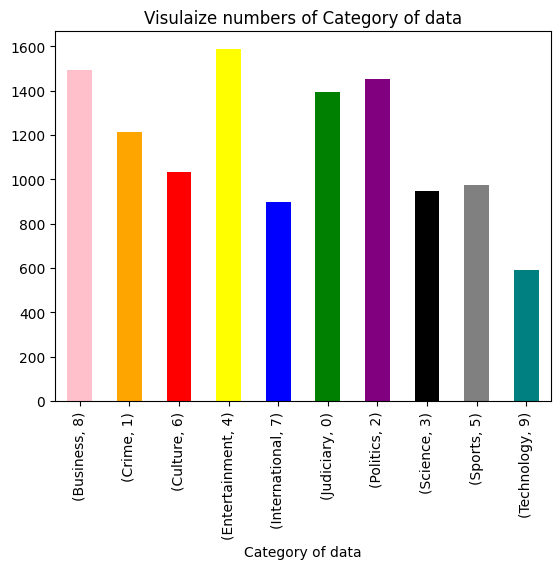

In [ ]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue", "green", "purple", "black", "gray", "teal"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

In [ ]:
text = dataset["Body"]
text.head(10)

0    madras high court issue significant remark ami...
1    seattle police officer guild friday come defen...
2    first official meeting one nation one election...
3    united airlines jet head rome turn around less...
4    three terrorist kill infiltration bid foil sec...
5    enforcement directorate ed likely summon top b...
6    loud explosion hear drone press service pinpoi...
7    bid republican presidential nomination vivek r...
8    keralas kozhikode report another confirm case ...
9    couple rajasthans jaipur catch camera kissing ...
Name: Body, dtype: object

In [ ]:
category = dataset['Category']
category.head(10)

0    Judiciary
1        Crime
2     Politics
3        Crime
4        Crime
5    Judiciary
6        Crime
7    Judiciary
8      Science
9        Crime
Name: Category, dtype: object

In [ ]:
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)
dataset['Body'] = dataset['Body'].apply(remove_tags)

In [ ]:
def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
dataset['Body'] = dataset['Body'].apply(special_char)

In [ ]:
def convert_lower(text):
    return text.lower()
dataset['Body'] = dataset['Body'].apply(convert_lower)
dataset['Body'][1]

'seattle police officer guild friday come defence official find make insensitive comment death indian student jaahnavi kandula early year say viral video police action share medium fail explain full story contextkandula student washingtons northeastern university strike officer kevin dave pedestrian crossing night january drive speed kmh way report drug overdose callin bodycam footage release monday seattle police department officer daniel auderer laugh deadly crash dismiss implication dave might fault criminal investigation necessaryin video auderer hear say yeah write cheque usd anyway limit valuethe video capture one side conversation much detail nuance not make public yet seattle police officer guild say statement also release letter write officer auderer latter say intend comment mockery lawyersus cop defend selfin letter date august office police accountability auderer say laugh ridiculousness incident litigate ridiculousness watch incident play two party bargain tragedyat time b

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]
dataset['Body'] = dataset['Body'].apply(remove_stopwords)
dataset['Body'][1]

['seattle',
 'police',
 'officer',
 'guild',
 'friday',
 'come',
 'defence',
 'official',
 'find',
 'make',
 'insensitive',
 'comment',
 'death',
 'indian',
 'student',
 'jaahnavi',
 'kandula',
 'early',
 'year',
 'say',
 'viral',
 'video',
 'police',
 'action',
 'share',
 'medium',
 'fail',
 'explain',
 'full',
 'story',
 'contextkandula',
 'student',
 'washingtons',
 'northeastern',
 'university',
 'strike',
 'officer',
 'kevin',
 'dave',
 'pedestrian',
 'crossing',
 'night',
 'january',
 'drive',
 'speed',
 'kmh',
 'way',
 'report',
 'drug',
 'overdose',
 'callin',
 'bodycam',
 'footage',
 'release',
 'monday',
 'seattle',
 'police',
 'department',
 'officer',
 'daniel',
 'auderer',
 'laugh',
 'deadly',
 'crash',
 'dismiss',
 'implication',
 'dave',
 'might',
 'fault',
 'criminal',
 'investigation',
 'necessaryin',
 'video',
 'auderer',
 'hear',
 'say',
 'yeah',
 'write',
 'cheque',
 'usd',
 'anyway',
 'limit',
 'valuethe',
 'video',
 'capture',
 'one',
 'side',
 'conversation',
 'm

In [ ]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Body'] = dataset['Body'].apply(lemmatize_word)
dataset['Body'][1]

'seattle police officer guild friday come defence official find make insensitive comment death indian student jaahnavi kandula early year say viral video police action share medium fail explain full story contextkandula student washington northeastern university strike officer kevin dave pedestrian crossing night january drive speed kmh way report drug overdose callin bodycam footage release monday seattle police department officer daniel auderer laugh deadly crash dismiss implication dave might fault criminal investigation necessaryin video auderer hear say yeah write cheque usd anyway limit valuethe video capture one side conversation much detail nuance make public yet seattle police officer guild say statement also release letter write officer auderer latter say intend comment mockery lawyersus cop defend selfin letter date august office police accountability auderer say laugh ridiculousness incident litigate ridiculousness watch incident play two party bargain tragedyat time believ

In [ ]:
dataset

Heading  \
0      free speech not hate speech madras high court ...   
1      comment take context say us cop mock indian st...   
2      first meeting one nation one election committe...   
3      us airlines flight depressurize midair plummet...   
4      terrorist kill security force foil infiltratio...   
...                                                  ...   
11578  constitutional statutory right vote status con...   
11579  face north korea threat deploy missile defence...   
11580  rs poll victory may not change ahmed patel ten...   
11581        gm mustard walk ominous footstep bt brinjal   
11582  vande mataram headlinegrabbing order not new m...   

                                                    Body       Category  \
0      madras high court issue significant remark ami...      Judiciary   
1      seattle police officer guild friday come defen...          Crime   
2      first official meeting one nation one election...       Politics   
3      united airline jet head rome turn around le ho...          Crime   
4      three terrorist kill infiltration bid foil sec...          Crime   
...                                                  ...            ...   
11578  new delhi paradoxical right vote assign status...       Politics   
11579  u thaad system missile range km reach height k...  International   
11580  despite somewhat smooth work relationship rahu...       Politics   
11581  centre tell supreme court would take decision ...         Sports   
11582  muralidaran also make news order neet cattle s...      Judiciary   

                                                     URL  CategoryId  
0      https://www.indiatoday.in/law/high-courts/stor...           0  
1      https://www.indiatoday.in/world/story/indian-s...           1  
2      https://www.indiatoday.in/india/story/one-nati...           2  
3      https://www.indiatoday.in/world/story/us-fligh...           1  
4      https://www.indiatoday.in/india/story/one-terr...           1  
...                                                  ...         ...  
11578  https://theprint.in/theprint-essential/constit...           2  
11579  https://theprint.in/defence/facing-north-korea...           7  
11580  https://theprint.in/theprint-primer/rs-poll-vi...           2  
11581  https://theprint.in/theprint-primer/gm-mustard...           5  
11582  https://theprint.in/theprint-primer/vande-mata...           0  

[11583 rows x 5 columns]

In [ ]:
x = dataset['Body']
y = dataset['CategoryId']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Body).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (11583, 5000)
y.shape =  (11583,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

8108
3475


In [ ]:
# Create list of model and accuracy dicts
perform_list = [ ]

In [ ]:
def run_model(model_name, est_c, est_pnlty):
    mdl = ""
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    # Add performance parameters to list
    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))

In [ ]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Test Accuracy Score of Basic Logistic Regression: % 72.14
Precision : 0.7214388489208633
Recall : 0.7214388489208633
F1-score : 0.7214388489208633


In [ ]:
run_model('Random Forest', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Random Forest: % 75.11
Precision : 0.7510791366906475
Recall : 0.7510791366906475
F1-score : 0.7510791366906475


In [ ]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 73.21
Precision : 0.7320863309352518
Recall : 0.7320863309352518
F1-score : 0.7320863309352517


In [ ]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 74.73
Precision : 0.7473381294964029
Recall : 0.7473381294964029
F1-score : 0.7473381294964029


In [ ]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 52.2
Precision : 0.5220143884892087
Recall : 0.5220143884892087
F1-score : 0.5220143884892087


In [ ]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

In [ ]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [ ]:
!pip  install transformers==4.22.1 -q

In [ ]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
model = TFAutoModel.from_pretrained("bert-base-uncased")


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


In [ ]:
df = pd.read_csv("/content/labelled.csv")
df.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  \
0  madras high court issue significant remark ami...  Judiciary   
1  seattle police officer guild friday come defen...      Crime   
2  first official meeting one nation one election...   Politics   
3  united airlines jet head rome turn around less...      Crime   
4  three terrorist kill infiltration bid foil sec...      Crime   

                                                 URL  
0  https://www.indiatoday.in/law/high-courts/stor...  
1  https://www.indiatoday.in/world/story/indian-s...  
2  https://www.indiatoday.in/india/story/one-nati...  
3  https://www.indiatoday.in/world/story/us-fligh...  
4  https://www.indiatoday.in/india/story/one-terr...

In [ ]:
category_count = df['Category'].value_counts()

categories = category_count.index

categories


Index(['Entertainment', 'Business', 'Politics', 'Judiciary', 'Crime',
       'Culture', 'Sports', 'Science', 'International', 'Technology'],
      dtype='object')

In [ ]:
categories = {
    "Entertainment" :   0,
"Business"  :       1,
"Politics"   :      2,
"Judiciary"   :     3,
"Crime"     :       4,
"Culture"    :      5,
"Sports"      :      6,
"Science"      :     7,
"International" :    8,
"Technology"     :   9
}

print(categories)


{'Entertainment': 0, 'Business': 1, 'Politics': 2, 'Judiciary': 3, 'Crime': 4, 'Culture': 5, 'Sports': 6, 'Science': 7, 'International': 8, 'Technology': 9}


In [ ]:
def map_to_encoding(text):
    return categories.get(text, -1)  # Return -1 if not found

# Create the 'category_encoding' column
df['category_encoding'] = df['Category'].apply(map_to_encoding)

In [ ]:
newsArticlesBody = df['Body'].to_list()

categoryLabels = df['category_encoding'].to_list()

In [ ]:
# Split the data into training, validation, and test sets (80% train, 10% val, 10% test)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    newsArticlesBody, categoryLabels, test_size=0.2, random_state=42, stratify = categoryLabels)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    test_texts, test_labels, test_size=0.5, random_state=42, stratify = test_labels)

# Display the size of each dataset
print("Train set size:", len(train_texts))
print("Validation set size:", len(val_texts))
print("Test set size:", len(test_texts))

# Verify the splitting and shuffle
print("Sample train text:", train_texts[0])
print("Sample train label:", train_labels[0])


Train set size: 9266
Validation set size: 1158
Test set size: 1159
Sample train text: rashmika mandanna allu arjun highly anticipate film pushpa rule leave fan eager excite film release maker leave part cliffhanger people high expectation sequel among cast member malayalam superstar fahadh faasil cameo appearance ips bhanwar singh shekhawat receive major attention intensity menacing performance although make brief appearance prequel fahadh play significant role alongside allu arjun upcoming film meanwhile late report state actor charge staggering rs crore role villain sequel leave fan astonishedfahadh faasil substantial fee role make one highestpaid villain south indian film industry accord report deccan chronicle consider film grand scale budget producer willing meet demand fahadh faasil fee rs crore role pushpa portion demand pushpa despite low compensation menacing performance iconic dialogue make last impacta source close production say talented actor kind role effortlessly ask ess

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)


In [ ]:
class BERTForClassification(tf.keras.Model):

    def __init__(self, bert_model, num_classes):
        super().__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.bert(inputs)[1]
        return self.fc(x)

In [ ]:
classifier = BERTForClassification(model, num_classes=10)

classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
num_epochs = 3
batch_size = 8

In [ ]:
# Convert the encodings and labels to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings), train_labels))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings), val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings), test_labels))

# Shuffle and batch the datasets
train_dataset = train_dataset.shuffle(len(train_texts)).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(len(test_texts)).batch(batch_size)
# Define the number of epochs and batch size

# Train the mod



In [ ]:
train_dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
classifier.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=num_epochs,
    batch_size=batch_size
)

Epoch 1/3
1159/1159 [==============================] - 1177s 995ms/step - loss: 0.9413 - accuracy: 0.7043 - val_loss: 0.7095 - val_accuracy: 0.7686
Epoch 2/3
1159/1159 [==============================] - 1151s 993ms/step - loss: 0.6102 - accuracy: 0.8134 - val_loss: 0.7074 - val_accuracy: 0.7798
Epoch 3/3
1159/1159 [==============================] - 1152s 994ms/step - loss: 0.4394 - accuracy: 0.8656 - val_loss: 0.7136 - val_accuracy: 0.7798


In [ ]:
classifier.evaluate(test_dataset)

145/145 [==============================] - 49s 336ms/step - loss: 0.6796 - accuracy: 0.7990


[0.6796050667762756, 0.7989646196365356]

In [ ]:
classifier.save("FineTunedBERT", save_format = "tf")


In [ ]:
!zip -r /content/FineTuned.zip /content/FineTunedBERT


  adding: content/FineTunedBERT/ (stored 0%)
  adding: content/FineTunedBERT/keras_metadata.pb (deflated 96%)
  adding: content/FineTunedBERT/fingerprint.pb (stored 0%)
  adding: content/FineTunedBERT/assets/ (stored 0%)
  adding: content/FineTunedBERT/saved_model.pb (deflated 92%)
  adding: content/FineTunedBERT/variables/ (stored 0%)
  adding: content/FineTunedBERT/variables/variables.index (deflated 79%)
  adding: content/FineTunedBERT/variables/variables.data-00000-of-00001 (deflated 12%)


In [ ]:
import pickle

# Save the classifier object using pickle
with open('Fine.pkl', 'wb') as file:
    pickle.dump(classifier, file)


In [ ]:
import pandas as pd
import umap
import hdbscan
from sentence_transformers import SentenceTransformer
import plotly.express as px
from keybert import KeyBERT
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("final_dataset_Preprocessed.csv")

In [ ]:
df.drop("Heading", axis=1, inplace=True)
df.drop("URL", axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
embedder = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device=device)
embeddings = embedder.encode(df["Body"].values)
print(embeddings)

In [ ]:
np.save('embeddings_final_dataset_Preprocessed.npy', embeddings)

In [ ]:
# embeddings = np.load(r"C:\Users\Dhruv\Downloads\embeddings_Headings_final_data_Preprocessed.npy")

In [ ]:
print(embeddings.shape)

(11583, 768)


In [ ]:
reduced_embeddings = umap.UMAP(n_components=2, n_neighbors=100, min_dist=0.02).fit_transform(embeddings)
print(reduced_embeddings.shape)

(11583, 2)


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=35)
labels = clusterer.fit_predict(reduced_embeddings)
df["label"] = [str(label) for label in labels]
print(f"Num of clusters: {labels.max()}")

Num of clusters: 30


In [ ]:
# put the values of the two dimensions inside the dataframe
df["x"] = reduced_embeddings[:, 0]
df["y"] = reduced_embeddings[:, 1]
# substring of the full text, for visualization purposes
df["text_short"] = df["Body"].str[:200]

In [ ]:
hover_data = {
    "text_short": True,
    "x": False,
    "y": False
}
fig = px.scatter(df, x="x", y="y", template="plotly_dark",
                   title="Embeddings", hover_data=hover_data)
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
num_outliers = len(df[df["label"] == "-1"])
print(f"Num of outliers: {num_outliers} ({num_outliers / len(df) * 100:.2f} % of total)")

Num of outliers: 3456 (29.84 % of total)


In [ ]:
df_no_outliers = df[df["label"] != "-1"]

# scatter plot
hover_data = {
    "text_short": True,
    "x": False,
    "y": False
}
fig = px.scatter(df_no_outliers, x="x", y="y", template="plotly_dark",
                   title="Embeddings", color="label", hover_data=hover_data)
fig.show()

In [ ]:
cluster = "1"
df_subset = df[df["label"] == cluster].reset_index()
texts_concat = ". ".join(df_subset["Heading"].values)
keywords_and_scores = KeyBERT().extract_keywords(texts_concat,
                                    keyphrase_ngram_range=(1, 1), top_n=10)
print(keywords_and_scores)

[('schumacher', 0.5447), ('alonso', 0.5014), ('ferrari', 0.4603), ('prix', 0.4576), ('prixs', 0.4172), ('racing', 0.3931), ('jenson', 0.3871), ('ferraris', 0.375), ('ricciardo', 0.3729), ('fia', 0.368)]


In [ ]:
def filter_keywords(keywords, n_keep=3):
    new_keywords = []
    for candidate_keyword in keywords:
        is_ok = True
        for compare_keyword in keywords:
            if candidate_keyword == compare_keyword:
                continue
            if compare_keyword in candidate_keyword:
                is_ok = False
                break
        if is_ok:
            new_keywords.append(candidate_keyword)
            if len(new_keywords) >= n_keep:
                break
    return new_keywords

keywords = [t[0] for t in keywords_and_scores]
keywords_filtered = filter_keywords(keywords)
print(keywords_filtered)

['schumacher', 'alonso', 'ferrari']


In [ ]:
df_no_outliers

In [ ]:
# assign a meaningful name to each cluster
def get_cluster_name(df, cluster):
    df_subset = df[df["label"] == cluster].reset_index()
    texts_concat = ". ".join(df_subset["Heading"])
    kw_model = KeyBERT()
    keywords_and_scores = kw_model.extract_keywords(texts_concat, keyphrase_ngram_range=(1, 1),
                                        top_n=10)
    keywords = [t[0] for t in keywords_and_scores]
    keywords_filtered = filter_keywords(keywords)
    return " - ".join(keywords_filtered)

# get all the new cluster names
all_clusters = df_no_outliers["label"].unique()
d_cluster_name_mapping = {}
for cluster in all_clusters:
    if cluster == "-1":
        d_cluster_name_mapping[cluster] = "outliers"
    else:
        d_cluster_name_mapping[cluster] = get_cluster_name(df_no_outliers, cluster)

# rename clusters
df_no_outliers["label"] = df_no_outliers["label"].apply(lambda label: d_cluster_name_mapping[label])

In [ ]:
clusters = df_no_outliers['label'].unique()

for cluster in clusters:
    # Combine all text for a specific cluster
    cluster_text = ' '.join(df_no_outliers[df_no_outliers['label'] == cluster]['Body'])

    # Generate a word cloud for the cluster's text
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from wordcloud import WordCloud

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df=pd.read_csv('dataset.csv')
df.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body Category  \
0  madras high court issue significant remark ami...      law   
1  seattle police officer guild friday come defen...    world   
2  first official meeting one nation one election...    india   
3  united airlines jet head rome turn around less...    world   
4  three terrorist kill infiltration bid foil sec...    india   

                                                 URL  
0  https://www.indiatoday.in/law/high-courts/stor...  
1  https://www.indiatoday.in/world/story/indian-s...  
2  https://www.indiatoday.in/india/story/one-nati...  
3  https://www.indiatoday.in/world/story/us-fligh...  
4  https://www.indiatoday.in/india/story/one-terr...

In [ ]:
df.shape

(11583, 4)

In [ ]:
corpus=list(df['Heading'])

In [ ]:
corpus[8775]

'switch shoe quota kota'

In [ ]:
corpus_embeddings=np.load('embeddings_headings.npy')

In [ ]:
print(corpus_embeddings.shape)

(11583, 768)


In [ ]:
# reduce the size of the embeddings using UMAP
reduced_embeddings = umap.UMAP(n_components=2, n_neighbors=100, min_dist=0.02).fit_transform(corpus_embeddings)
print(reduced_embeddings.shape)

# put the values of the two dimensions inside the dataframe
df["x"] = reduced_embeddings[:, 0]
df["y"] = reduced_embeddings[:, 1]

# substring of the full text, for visualization purposes
df["text_short"] = df["Heading"].str[:100]

(11583, 2)


In [ ]:
reduced_embeddings

array([[ 4.121452 , 13.71243  ],
       [ 5.1715937, 13.216642 ],
       [ 2.2453568, 14.896557 ],
       ...,
       [ 2.8906205, 14.469297 ],
       [ 7.1107893, 11.611894 ],
       [ 3.7655547, 13.135024 ]], dtype=float32)

In [ ]:
# scatter plot
hover_data = {
    "text_short": True,
    "x": False,
    "y": False
}
fig = px.scatter(df, x="x", y="y", template="plotly_dark",
                   title="Embeddings", hover_data=hover_data)
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
num_clusters=10
clustering_model=KMeans(n_clusters=num_clusters)
clustering_model.fit(reduced_embeddings)
cluster_assignment=clustering_model.labels_

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
cluster_assignment

array([3, 6, 8, ..., 8, 5, 3])

In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

corpus  cluster
0  free speech not hate speech madras high court ...        3
1  comment take context say us cop mock indian st...        6
2  first meeting one nation one election committe...        8
3  us airlines flight depressurize midair plummet...        6
4  terrorist kill security force foil infiltratio...        6

In [ ]:
desired_cluster = 0
selected_df = cluster_df[cluster_df['cluster'] == desired_cluster]
selected_df.head(15)

corpus  cluster
16   biden not pardon son hunter find guilty gun ch...        0
26   india today archive america tilt towards pakistan        0
40                      india race secure border china        0
49   bright brilliant determine amitabh kant praise...        0
56   belarus propose threeway cooperation russia no...        0
57   north koreas kim inspect russian nuclearcapabl...        0
60   kim jong un visit russias pacific fleet amid t...        0
63   canada defers trade mission india amid politic...        0
297  two russian cosmonaut launch space station ame...        0
313  kim jong un meet vladimir putin russian spacep...        0
449  first round wastewater release fukushima nucle...        0
507      economy drain pakistan lose brain record rate        0
512                     african union inclusion g help        0
532  opinion saudi crown prince postg summit stay o...        0
539  opinion undoing civilisation ccp ongoing plan ...        0

In [ ]:
selected_df.shape

(897, 2)

In [ ]:
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(width=800, height=500,
    random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

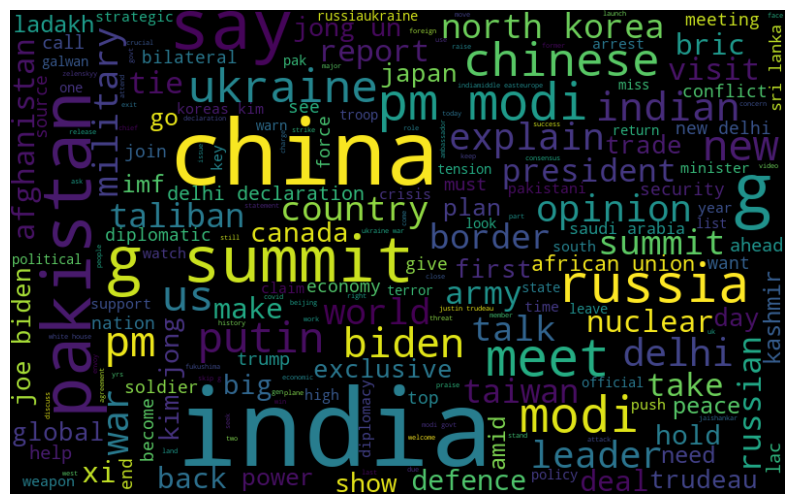

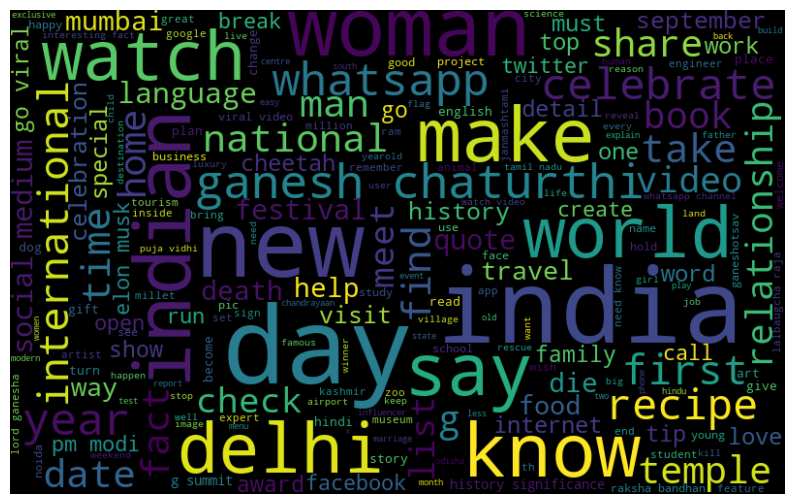

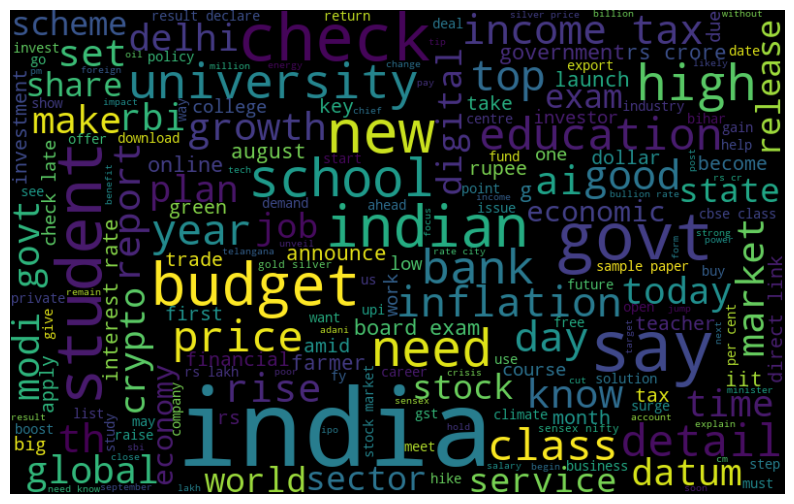

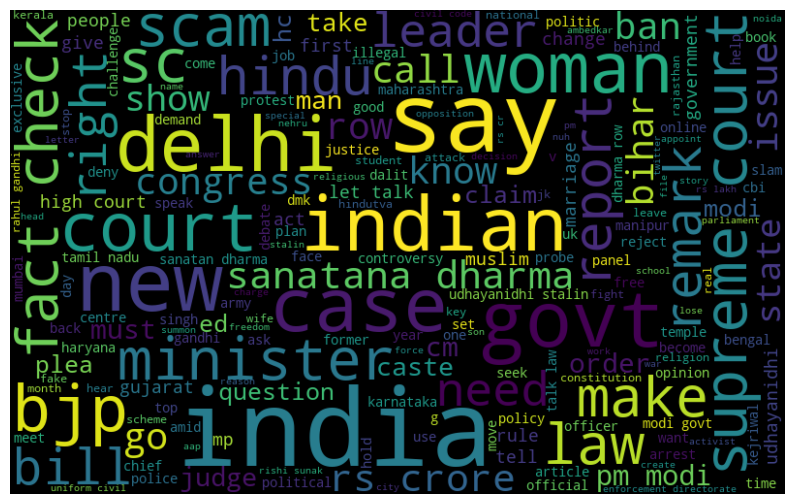

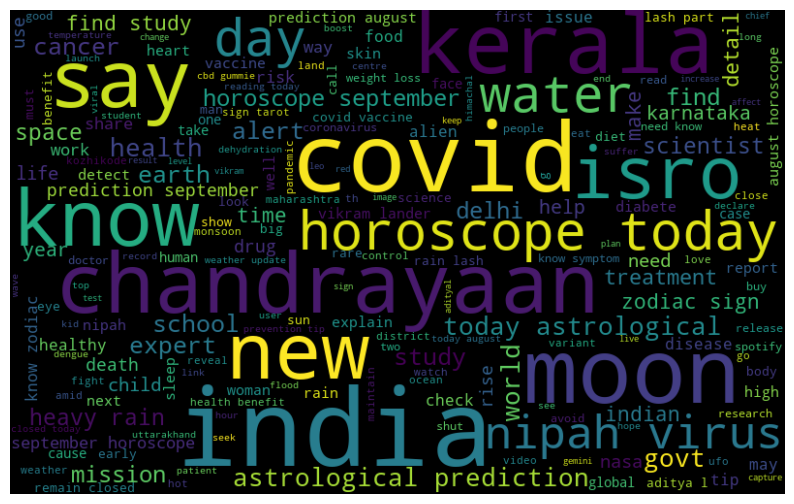

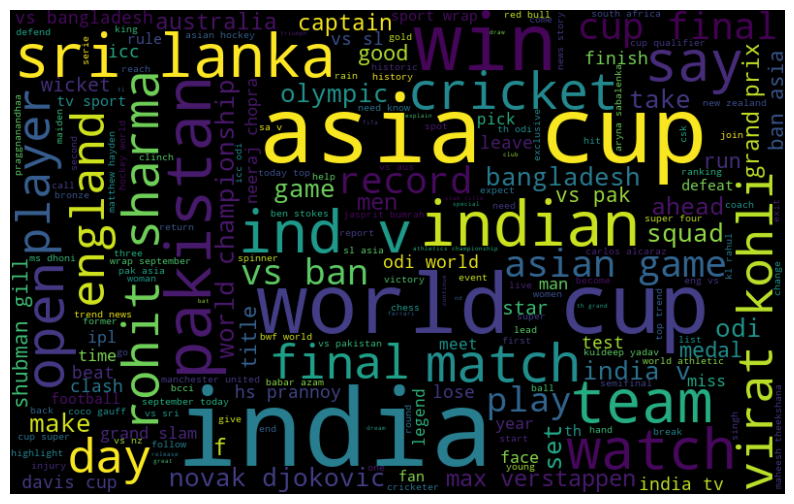

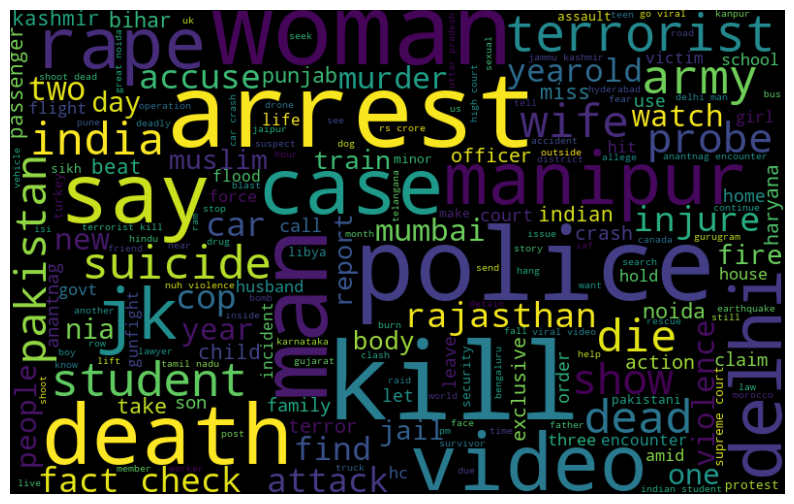

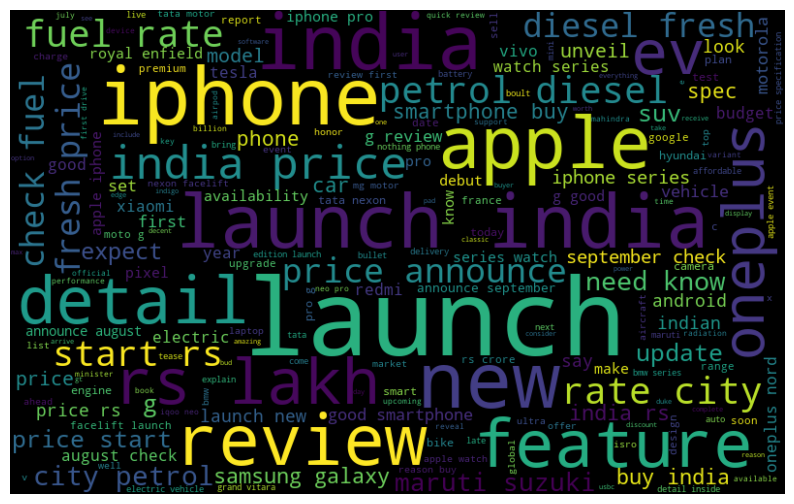

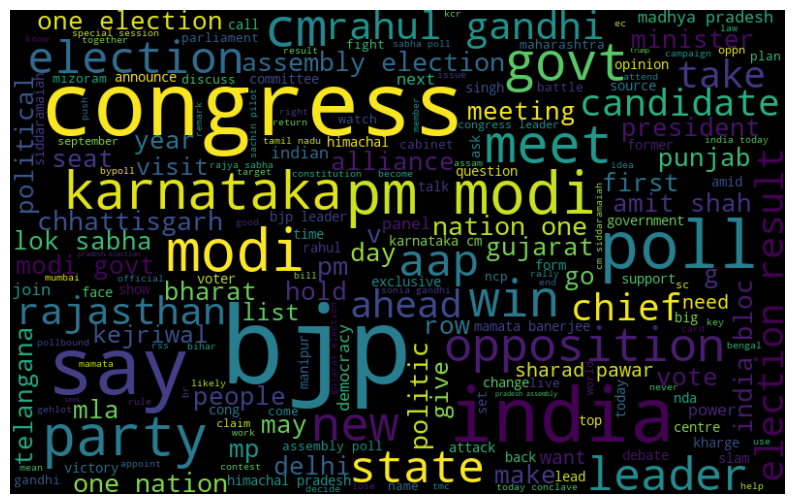

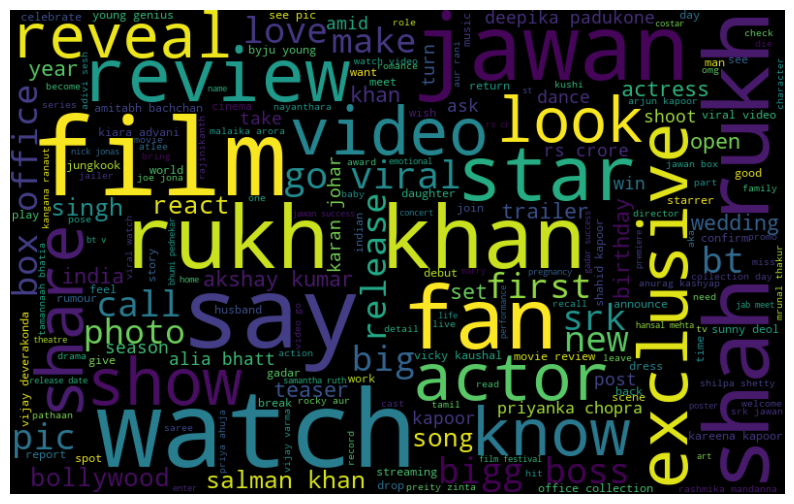

In [ ]:
for i in range(10):
    word_cloud(cluster_df,i)

In [ ]:
def categorize(label):
    if label==3:
        return 'Judiciary'
    elif label==9:
        return 'Entertainment'
    elif label==4:
        return 'Science'
    elif label==5:
        return 'Sports'
    elif label==8:
        return 'Politics'
    elif label==0:
        return 'International'
    elif label==7:
        return 'Technology'
    elif label==2:
        return 'Business'
    elif label==1:
        return 'Culture'
    elif label==6:
        return 'Crime'
    else:
        return label

In [ ]:
cluster_df['Body']=df['Body']
cluster_df.head()

corpus  cluster  \
0  free speech not hate speech madras high court ...        3   
1  comment take context say us cop mock indian st...        6   
2  first meeting one nation one election committe...        8   
3  us airlines flight depressurize midair plummet...        6   
4  terrorist kill security force foil infiltratio...        6   

                                                Body  
0  madras high court issue significant remark ami...  
1  seattle police officer guild friday come defen...  
2  first official meeting one nation one election...  
3  united airlines jet head rome turn around less...  
4  three terrorist kill infiltration bid foil sec...

In [ ]:
cluster_df['Category'] = cluster_df['cluster'].apply(categorize)
pd.unique(cluster_df['Category'])

array(['Judiciary', 'Crime', 'Politics', 'Science', 'Entertainment',
       'Sports', 'Culture', 'International', 'Business', 'Technology'],
      dtype=object)

In [ ]:
cluster_df.head()

corpus  cluster  \
0  free speech not hate speech madras high court ...        3   
1  comment take context say us cop mock indian st...        6   
2  first meeting one nation one election committe...        8   
3  us airlines flight depressurize midair plummet...        6   
4  terrorist kill security force foil infiltratio...        6   

                                                Body   Category  
0  madras high court issue significant remark ami...  Judiciary  
1  seattle police officer guild friday come defen...      Crime  
2  first official meeting one nation one election...   Politics  
3  united airlines jet head rome turn around less...      Crime  
4  three terrorist kill infiltration bid foil sec...      Crime

In [ ]:
del cluster_df['cluster']
cluster_df.head()

corpus  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  
0  madras high court issue significant remark ami...  Judiciary  
1  seattle police officer guild friday come defen...      Crime  
2  first official meeting one nation one election...   Politics  
3  united airlines jet head rome turn around less...      Crime  
4  three terrorist kill infiltration bid foil sec...      Crime

In [ ]:
cluster_df.rename(columns={'corpus': 'Heading'}, inplace=True)
cluster_df.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  
0  madras high court issue significant remark ami...  Judiciary  
1  seattle police officer guild friday come defen...      Crime  
2  first official meeting one nation one election...   Politics  
3  united airlines jet head rome turn around less...      Crime  
4  three terrorist kill infiltration bid foil sec...      Crime

In [ ]:
cluster_df['URL']=df['URL']
cluster_df.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  \
0  madras high court issue significant remark ami...  Judiciary   
1  seattle police officer guild friday come defen...      Crime   
2  first official meeting one nation one election...   Politics   
3  united airlines jet head rome turn around less...      Crime   
4  three terrorist kill infiltration bid foil sec...      Crime   

                                                 URL  
0  https://www.indiatoday.in/law/high-courts/stor...  
1  https://www.indiatoday.in/world/story/indian-s...  
2  https://www.indiatoday.in/india/story/one-nati...  
3  https://www.indiatoday.in/world/story/us-fligh...  
4  https://www.indiatoday.in/india/story/one-terr...

In [ ]:
cluster_df.to_csv('labelled.csv', index=False)

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
import pandas as pd
import torch

In [ ]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
tokenizer.save_pretrained("tokenizer_roberta/token_izer")

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("./tokenizer_roberta/sentiment_tokenizer/")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("./cardiffnlp/twitter-roberta-base-sentiment/")

In [ ]:
def sentiment(row):
    text = row[:1500]
    encoded_input = tokenizer(text, return_tensors='pt')
    with torch.no_grad():  # Disable gradient calculation during inference
        output = model(**encoded_input)
    scores = output[0][0].cpu().numpy()  # Move scores to CPU for further processing
    scores = softmax(scores)


    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    max_score = 0
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        if s > max_score:
            final = l
            max_score = s
    return final

### News18

In [ ]:
df = pd.read_excel(r"C:\Users\Dhruv\Downloads\sih\IndiaToday_Preprocessed.xlsx")

In [ ]:
df = df.iloc[:100, :]

In [ ]:
df["Sentiment"] = df.Body.apply(lambda x: sentiment(str(x)))

In [ ]:
df.head()

Heading  \
0  'Free speech should not be hate speech': Madra...   
1  'Comments taken out of context', says US cop w...   
2  First meeting of 'One Nation One Election' com...   
3  US airlines’ flight depressurizes mid-air, plu...   
4  3 terrorists killed as security forces foil in...   

                                                Body Category  \
0  madras high court issue significant remark ami...      law   
1  seattle police officer guild friday come defen...    world   
2  first official meeting one nation one election...    india   
3  united airlines jet head rome turn around less...    world   
4  three terrorist kill infiltration bid foil sec...    india   

                                                 URL Sentiment  
0  https://www.indiatoday.in/law/high-courts/stor...   neutral  
1  https://www.indiatoday.in/world/story/indian-s...   neutral  
2  https://www.indiatoday.in/india/story/one-nati...   neutral  
3  https://www.indiatoday.in/world/story/us-fligh...   neutral  
4  https://www.indiatoday.in/india/story/one-terr...  negative

In [ ]:
df.head()

Heading  \
0  'Free speech should not be hate speech': Madra...   
1  'Comments taken out of context', says US cop w...   
2  First meeting of 'One Nation One Election' com...   
3  US airlines’ flight depressurizes mid-air, plu...   
4  3 terrorists killed as security forces foil in...   

                                                Body Category  \
0  madras high court issue significant remark ami...      law   
1  seattle police officer guild friday come defen...    world   
2  first official meeting one nation one election...    india   
3  united airlines jet head rome turn around less...    world   
4  three terrorist kill infiltration bid foil sec...    india   

                                                 URL Sentiment  
0  https://www.indiatoday.in/law/high-courts/stor...   neutral  
1  https://www.indiatoday.in/world/story/indian-s...   neutral  
2  https://www.indiatoday.in/india/story/one-nati...   neutral  
3  https://www.indiatoday.in/world/story/us-fligh...   neutral  
4  https://www.indiatoday.in/india/story/one-terr...  negative

In [ ]:
file_name = "News18_with_sentiment.xlsx"
df.to_excel(file_name, index=False)

### IndiaToday

In [ ]:
df2 = pd.read_excel(r"C:\Users\Dhruv\Downloads\sih\IndiaToday_Preprocessed.xlsx")

In [ ]:
df2["Sentiment"] = df2.Body.apply(lambda x: sentiment(str(x)))

In [ ]:
file_name = "IndiaToday_with_sentiment.xlsx"
df2.to_excel(file_name, index=False)

### IndiaTV

In [ ]:
df3 = pd.read_excel(r"C:\Users\Dhruv\Downloads\sih\IndiaTV_Preprocessed.xlsx")

In [ ]:
df3["Sentiment"] = df3.Body.apply(lambda x: sentiment(x))

In [ ]:
file_name = "IndiaTV_with_sentiment.xlsx"
df3.to_excel(file_name, index=False)

In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:
data = pd.read_csv("labelled.csv")

In [ ]:
data.head()

Heading  \
0  free speech not hate speech madras high court ...   
1  comment take context say us cop mock indian st...   
2  first meeting one nation one election committe...   
3  us airlines flight depressurize midair plummet...   
4  terrorist kill security force foil infiltratio...   

                                                Body   Category  \
0  madras high court issue significant remark ami...  Judiciary   
1  seattle police officer guild friday come defen...      Crime   
2  first official meeting one nation one election...   Politics   
3  united airlines jet head rome turn around less...      Crime   
4  three terrorist kill infiltration bid foil sec...      Crime   

                                                 URL  
0  https://www.indiatoday.in/law/high-courts/stor...  
1  https://www.indiatoday.in/world/story/indian-s...  
2  https://www.indiatoday.in/india/story/one-nati...  
3  https://www.indiatoday.in/world/story/us-fligh...  
4  https://www.indiatoday.in/india/story/one-terr...

In [ ]:
sentiment_scores = []
sentiment_classes = []

In [ ]:
for index, row in data.iterrows():
    heading = row["Heading"]
    body = row["Body"]

    combined_text = heading + " " + body

    # sentiment analysis using TextBlob
    analysis = TextBlob(combined_text)
    sentiment_score = analysis.sentiment.polarity

    # Classify the sentiment
    if sentiment_score > 0:
        sentiment_class = "positive"
    elif sentiment_score < 0:
        sentiment_class = "negative"
    else:
        sentiment_class = "neutral"

    sentiment_scores.append(sentiment_score)
    sentiment_classes.append(sentiment_class)

In [ ]:
data["sentiment_score"] = sentiment_scores
data["sentiment_class"] = sentiment_classes

In [ ]:
data.to_csv("news_data_with_sentiment.csv", index=False)

In [ ]:
test_data=pd.read_excel('testing.xlsx')

In [ ]:
test_data.head()

Heading  \
0  Anantnag encounter Day 6: Charred body of terr...   
1  Special session of Parliament begins today: PM...   
2  S Jaishankar says ‘West not the bad guy’ in ve...   
3  No Nipah virus cases for 2nd day, Kerala Healt...   
4  Schedule, in Hindi, torn up, complaints over c...   

                                                Body Category  \
0  security force recover charred body terrorist ...    india   
1  fiveday long special session parliament commen...    india   
2  external affairs minister jaishankar sunday sa...    india   
3  kerala government sunday say nipah outbreak st...    india   
4  raise objection flaghoiste programme sheet pri...    india   

                                                 URL  
0  https://www.indiatoday.in/india/story/anantnag...  
1  https://www.indiatoday.in/india/story/parliame...  
2  https://www.indiatoday.in/india/story/in-veile...  
3  https://www.indiatoday.in/india/story/no-nipah...  
4  https://www.indiatoday.in/india/story/dmk-mp-t...